In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data = pd.read_csv(r"C:\Users\rajen\Downloads\archive (16)\EV_cars.csv")

# check the dimension of the dataset
print(data.shape)

# check the columns names 
print(data.columns)

# view the first 5 rows of the dataset
data.head()

(360, 9)
Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


#### Attributes Description:

1. Battery - The capacity of the vehicle's battery in kilowatt-hours (kWh).
2. Car_Name - The model name of the electric vehicle.
3. Car_name_link - A direct link to the corresponding page on EV Database for more in-depth information.
4. Efficiency - The energy efficiency rating of the vehicle in watt-hours per kilometer (Wh/km).
5. Fast_charge - The fast-charging capability of the vehicle in minutes for a certain charging percentage.
6. Price.DE. - The price of the electric vehicle in Germany.
7. Range - The driving range of the vehicle on a single charge in kilometers.
8. Top_speed - The maximum speed the vehicle can achieve in kilometers per hour.
9. acceleration..0.100. - The acceleration time from 0 to 100 kilometers per hour.

In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery               360 non-null    float64
 1   Car_name              360 non-null    object 
 2   Car_name_link         360 non-null    object 
 3   Efficiency            360 non-null    int64  
 4   Fast_charge           358 non-null    float64
 5   Price.DE.             309 non-null    float64
 6   Range                 360 non-null    int64  
 7   Top_speed             360 non-null    int64  
 8   acceleration..0.100.  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


# Data Cleaning

In [4]:
# columns 'Car_name' & 'Car_name_link' will be excluded from the following analysis
# drop these 2 columns
data.drop(columns=['Car_name', 'Car_name_link'], axis=1, inplace=True)

In [5]:
# rename the column name for easier manipulation 
data.rename({'Fast_charge':'FastCharge',
            'Price.DE.':'Price',
            'Top_speed':'TopSpeed',
            'acceleration..0.100.':'AccelerationTime'}, axis=1, inplace=True)

# display the first 5 rows of the dataset after column renaming
data.head()

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,172,670.0,59017.0,435,217,5.0
1,57.5,137,700.0,46220.0,420,201,6.1
2,60.5,183,370.0,44625.0,330,160,7.3
3,61.7,171,630.0,39990.0,360,160,7.9
4,75.0,149,780.0,55220.0,505,201,4.4


In [6]:
data.isna().sum()

Battery              0
Efficiency           0
FastCharge           2
Price               51
Range                0
TopSpeed             0
AccelerationTime     0
dtype: int64

In [7]:
# Fill null with mean of each attributes
data['FastCharge'] = data['FastCharge'].fillna(data['FastCharge'].mean())
data['Price'] = data['Price'].fillna(data['Price'].mean())

# Exploratory Data Analysis (EDA)

In [8]:
# visualize the distribution of each feature in the dataset
# all features in the dataset are numerical
# define a helper function to plot histogram and boxplot for visualizing the distribution

def distribution(feature, featureDescription):
    figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
    sns.histplot(data=data, x=data[feature], color='cornflowerblue', ax=axes[0])
    axes[0].set_xlabel(featureDescription)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(alpha=0.4)
    sns.boxplot(data=data, y=data[feature], color='cornflowerblue', ax=axes[1])
    axes[1].set_ylabel(featureDescription)
    axes[1].grid(alpha=0.4)
    figure.suptitle(f'Distribution of Samples by {featureDescription}', fontsize=15)
    plt.tight_layout(pad=1.5)
    plt.show()

#### Feature 1 | `Battery` - The capacity of the vehicle's battery in kilowatt-hours (kWh)

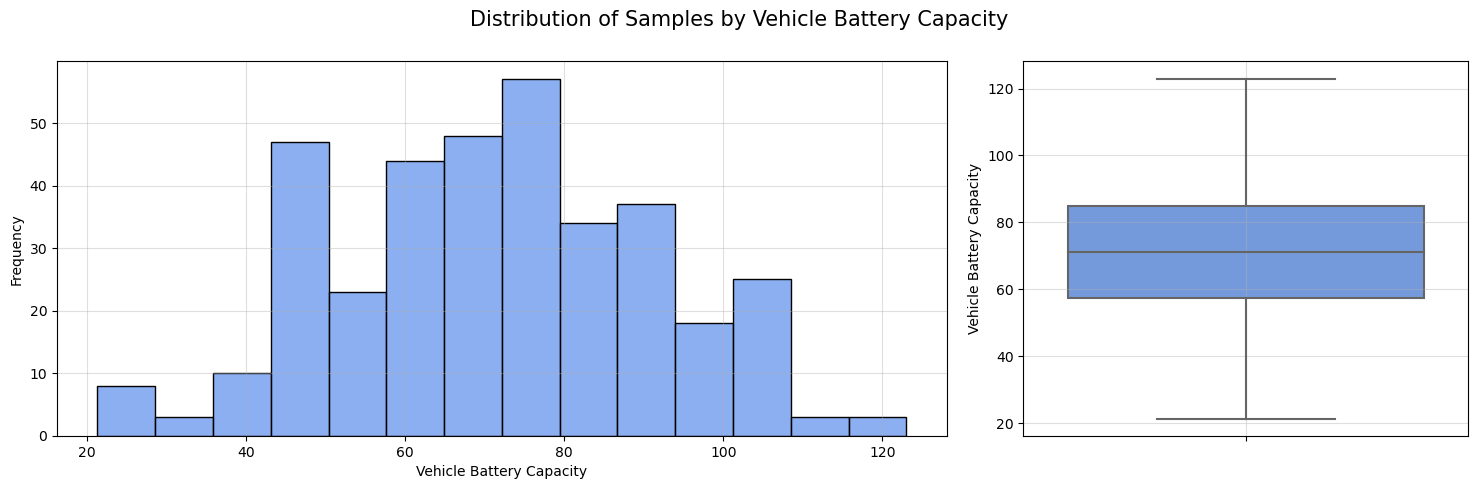

In [9]:
# distribution of samples by battery capacity
distribution('Battery','Vehicle Battery Capacity')

#### Feature 2 | `Efficiency` - The energy efficiency rating of the vehicle in watt-hours per kilometer (Wh/km)

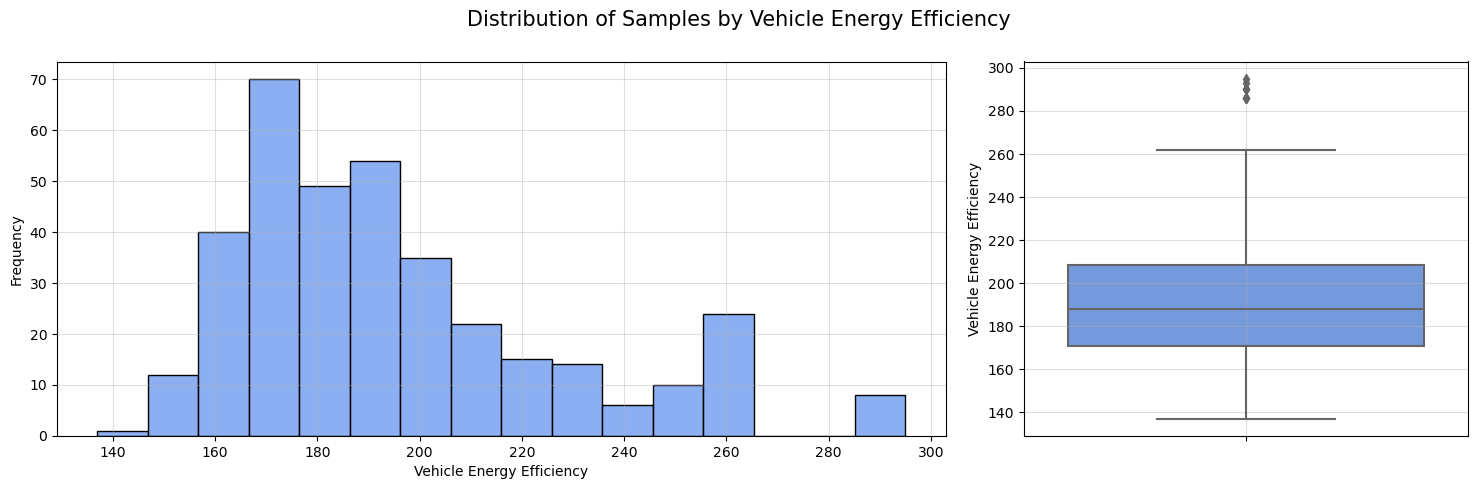

In [10]:
# distribution of samples by efficiency
distribution('Efficiency','Vehicle Energy Efficiency')

#### Feature 3 | `FastCharge` - The fast-charging capability of the vehicle in minutes for a certain charging percentage

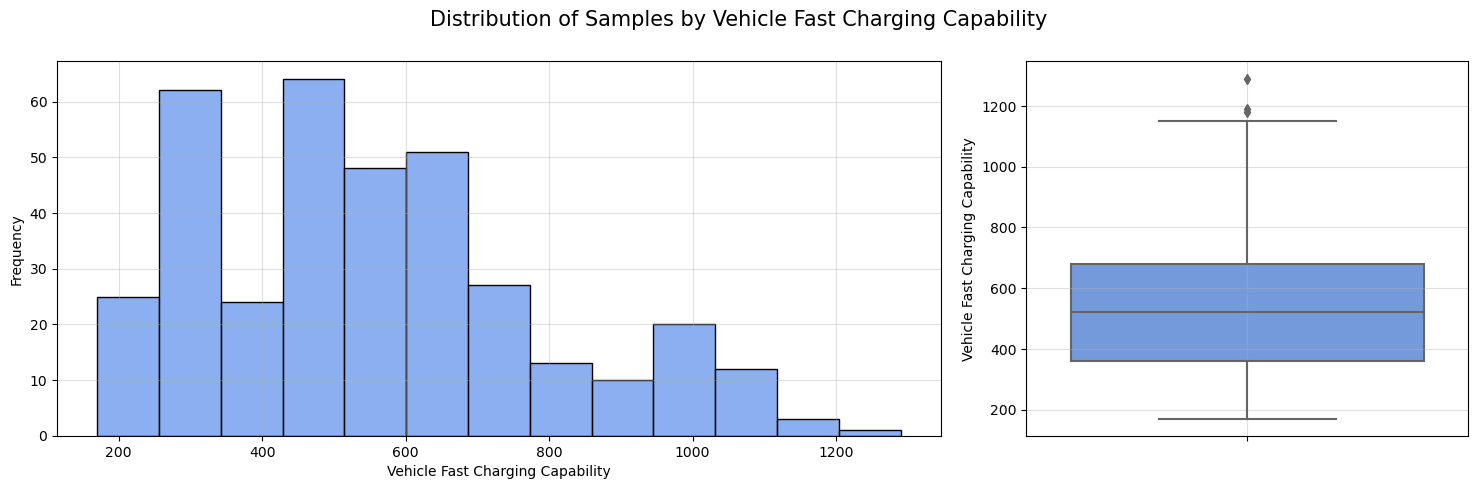

In [11]:
# distribution of samples by efficiency
distribution('FastCharge','Vehicle Fast Charging Capability')

#### Feature 4 | `Range` - The driving range of the vehicle on a single charge in kilometers.

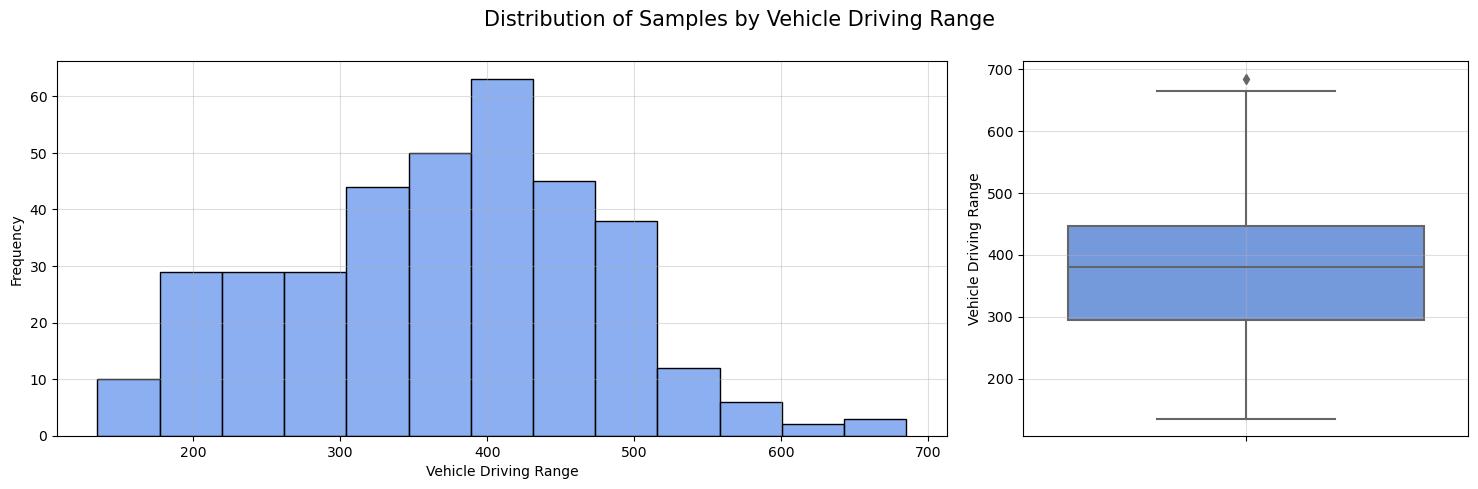

In [12]:
# distribution of samples by driving range
distribution('Range','Vehicle Driving Range')

#### Feature 5 | `TopSpeed` - The maximum speed the vehicle can achieve in kilometers per hour

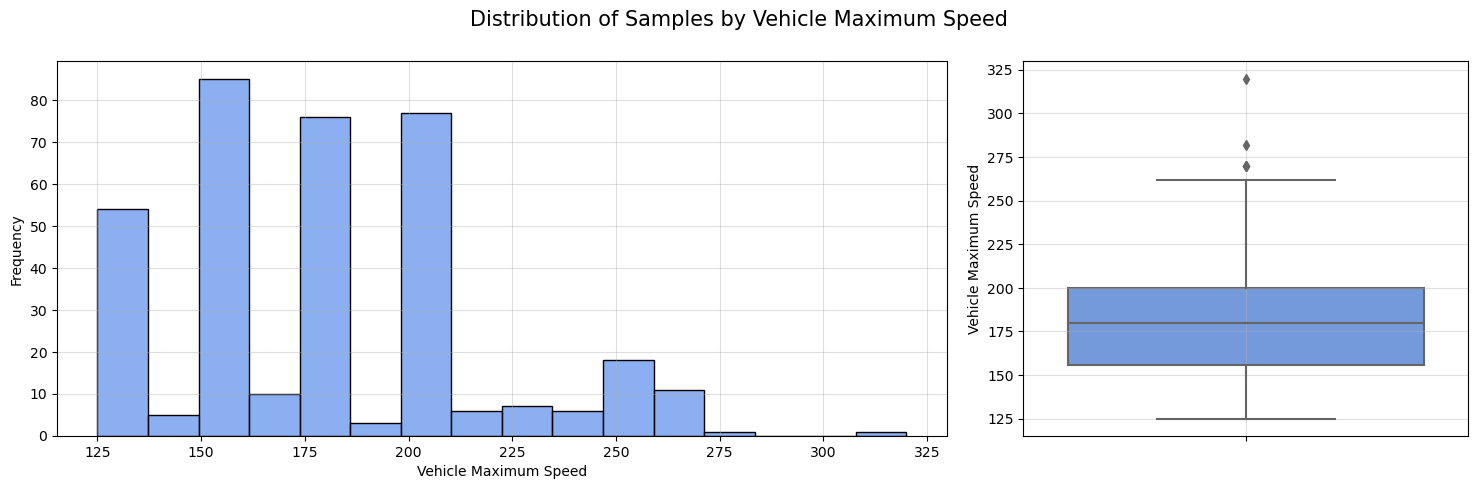

In [13]:
# distribution of samples by vehicle maximum speed
distribution('TopSpeed','Vehicle Maximum Speed')

#### Feature 6 | `AccelerationTime` - The acceleration time from 0 to 100 kilometers per hour

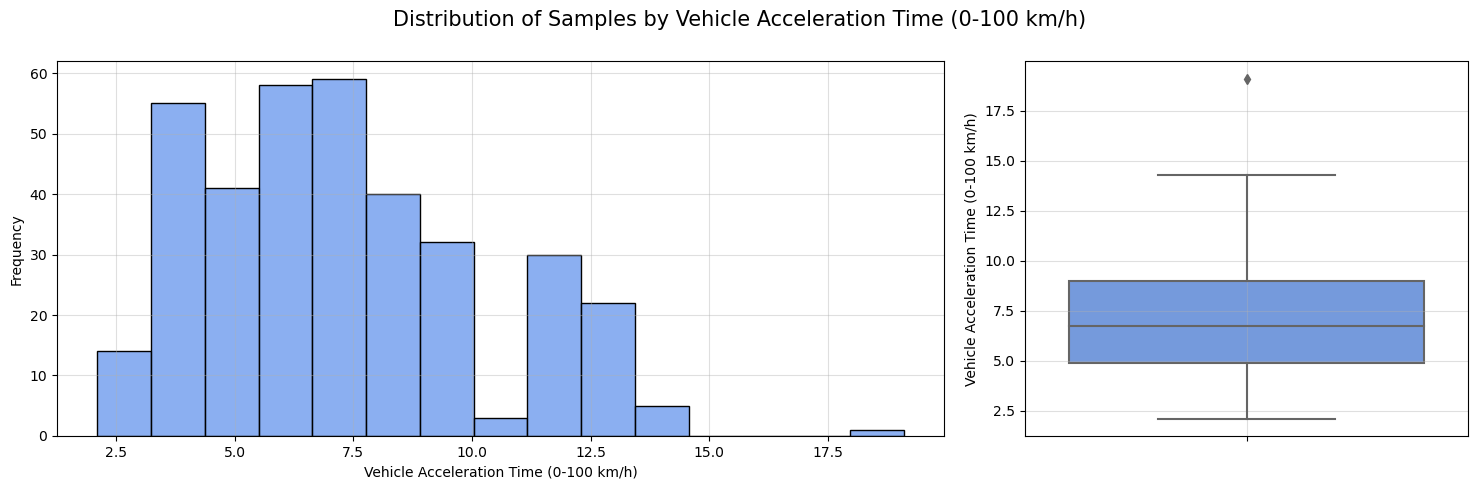

In [14]:
# distribution of samples by vehicle acceleration time
distribution('AccelerationTime','Vehicle Acceleration Time (0-100 km/h)')

#### Target | `Price` - The price of the electric vehicle in Germany

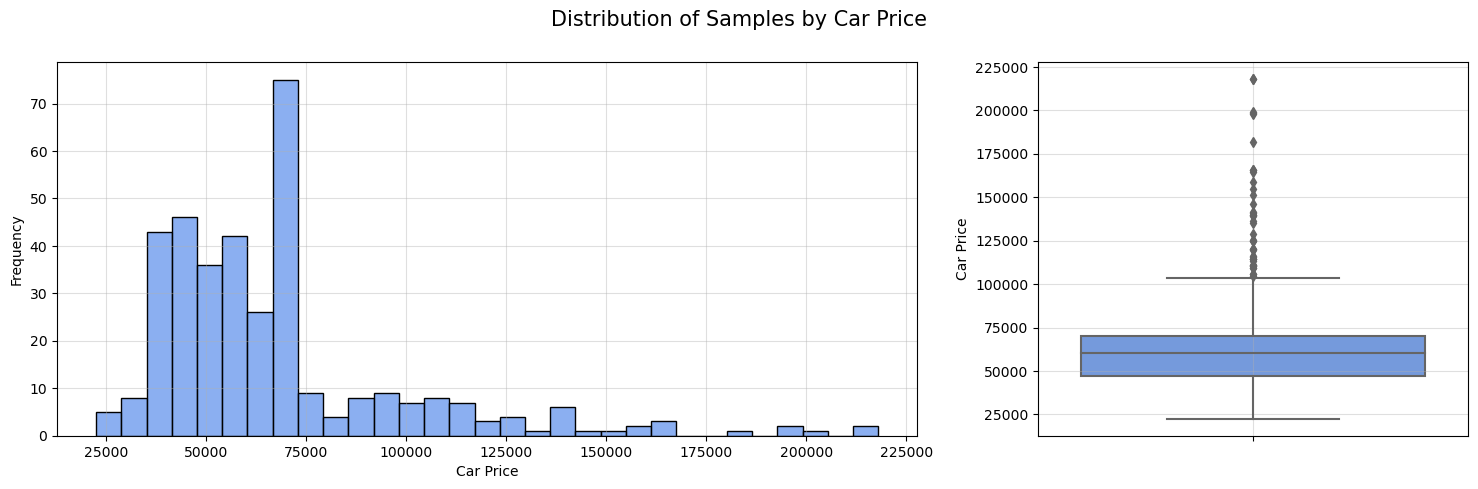

In [15]:
# distribution of car price
distribution('Price','Car Price')

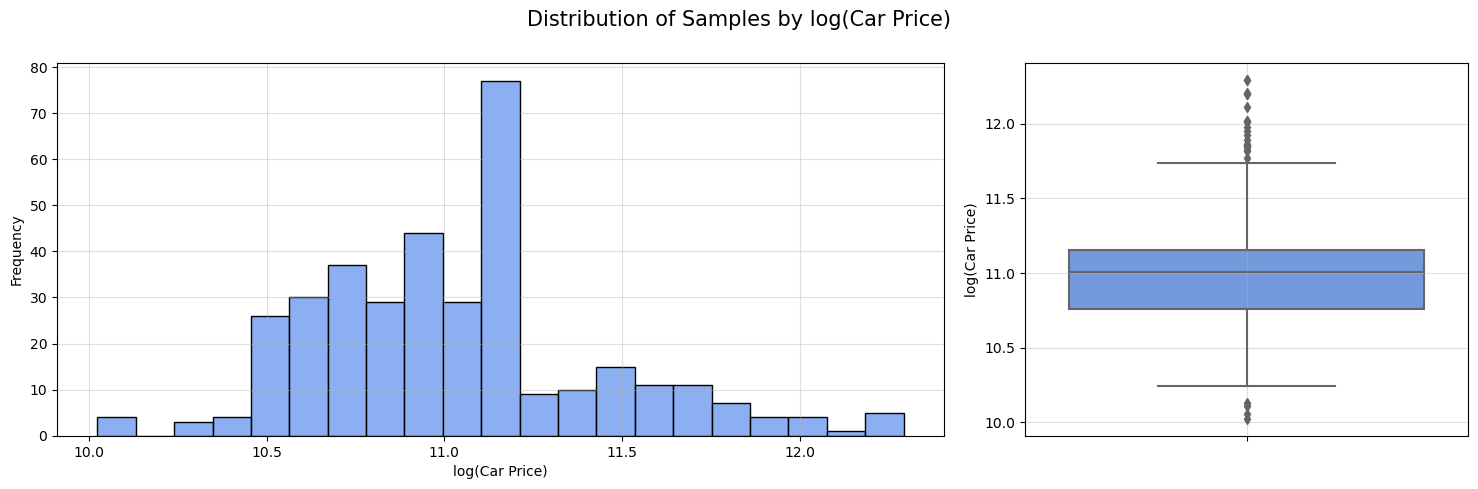

In [16]:
# visualize the distribution of each feature in the dataset

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=data, x=np.log(data['Price']), color='cornflowerblue', ax=axes[0])
axes[0].set_xlabel('log(Car Price)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, y=np.log(data['Price']), color='cornflowerblue', ax=axes[1])
axes[1].set_ylabel('log(Car Price)')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of Samples by log(Car Price)', fontsize=15)
plt.tight_layout(pad=1.5)
plt.show()

In [17]:
data

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,172,670.0,59017.0,435,217,5.0
1,57.5,137,700.0,46220.0,420,201,6.1
2,60.5,183,370.0,44625.0,330,160,7.3
3,61.7,171,630.0,39990.0,360,160,7.9
4,75.0,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...
355,46.3,257,290.0,52730.0,180,130,12.1
356,46.3,250,290.0,55990.0,185,130,12.1
357,46.3,257,290.0,51825.0,180,130,12.1
358,68.0,257,290.0,69250.0,265,130,13.3


In [18]:
# Check Outlier on Numeric Columns
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [19]:
for col in data.columns:
    print(col, check_outlier(data, col))

Battery False
Efficiency False
FastCharge False
Price False
Range False
TopSpeed False
AccelerationTime False


## Cars Clusters Using K-Means Clustering

In [20]:
# Importing the library
from sklearn.cluster import KMeans

# Prepare dataset
X = data
X

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,172,670.0,59017.0,435,217,5.0
1,57.5,137,700.0,46220.0,420,201,6.1
2,60.5,183,370.0,44625.0,330,160,7.3
3,61.7,171,630.0,39990.0,360,160,7.9
4,75.0,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...
355,46.3,257,290.0,52730.0,180,130,12.1
356,46.3,250,290.0,55990.0,185,130,12.1
357,46.3,257,290.0,51825.0,180,130,12.1
358,68.0,257,290.0,69250.0,265,130,13.3


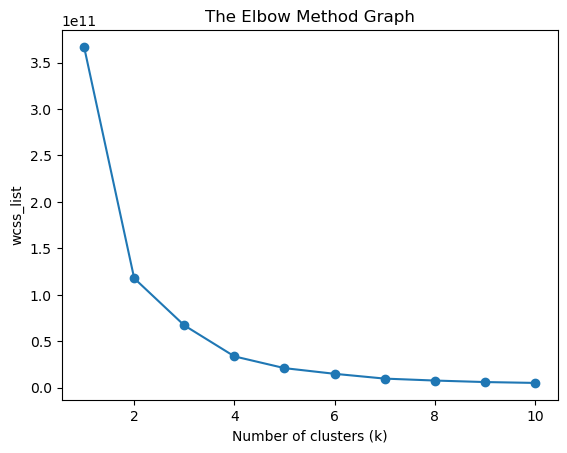

In [21]:
# Finding optimal number of cluster using the elbow method
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters (k)")
plt.ylabel("wcss_list")
plt.show()

In [22]:
# Train the K-Means model on the dataset
km = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(X)
label = km.labels_

In [23]:
# Add label into dataset
X["Label"] = label
X

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime,Label
0,75.0,172,670.0,59017.0,435,217,5.0,1
1,57.5,137,700.0,46220.0,420,201,6.1,1
2,60.5,183,370.0,44625.0,330,160,7.3,1
3,61.7,171,630.0,39990.0,360,160,7.9,1
4,75.0,149,780.0,55220.0,505,201,4.4,1
...,...,...,...,...,...,...,...,...
355,46.3,257,290.0,52730.0,180,130,12.1,1
356,46.3,250,290.0,55990.0,185,130,12.1,1
357,46.3,257,290.0,51825.0,180,130,12.1,1
358,68.0,257,290.0,69250.0,265,130,13.3,1


## Visualization of Cluster

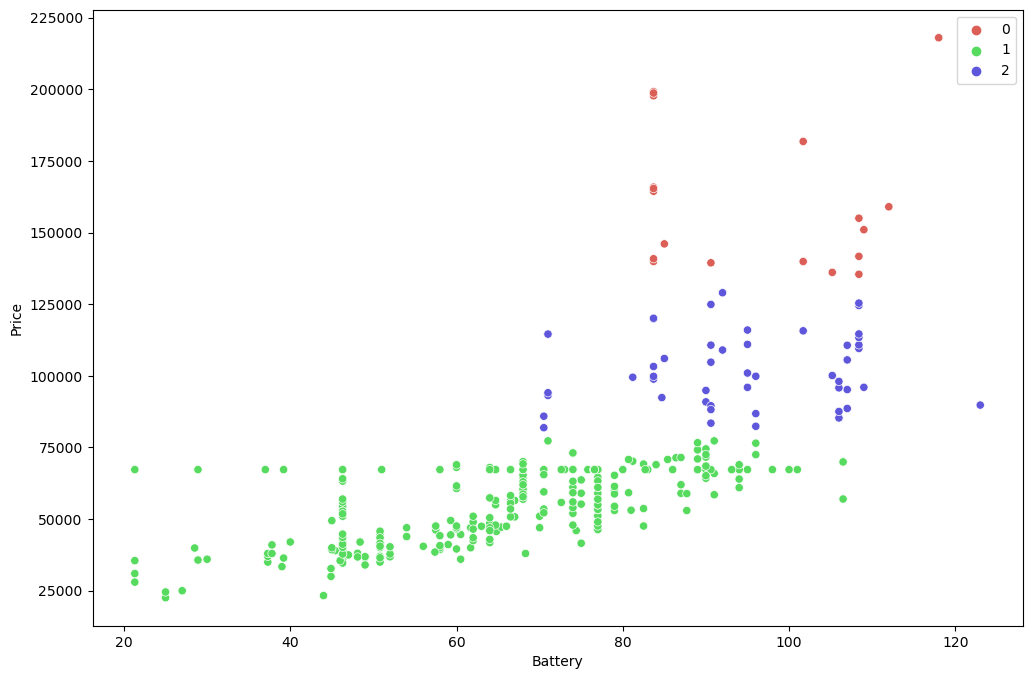

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X['Battery'], y=X['Price'], hue=X['Label'],
                palette=sns.color_palette('hls', 3))
plt.legend()
plt.show()

#### Correlation Analysis between Features and Target/Labels

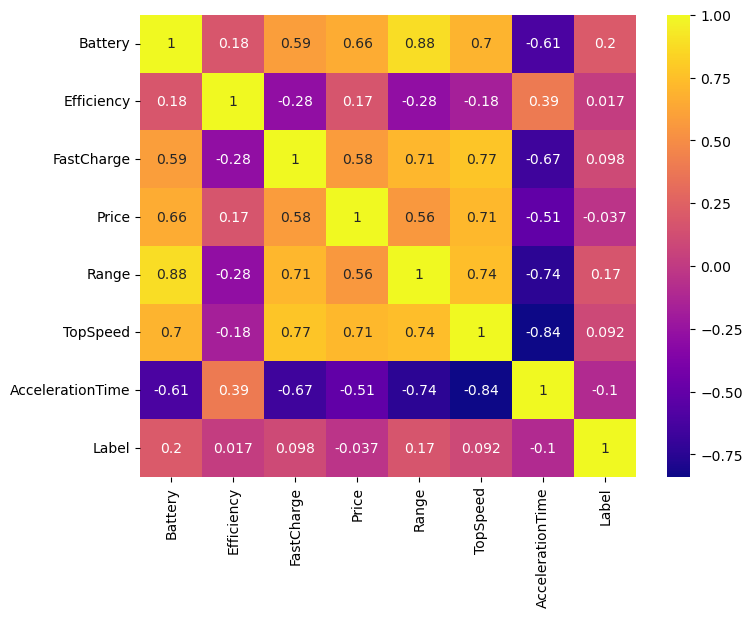

In [25]:
# calculate the Pearson correlation between each features
correlation = data.corr()

# visualize the correlation in heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

# Data Pre-processing for Model Training

In [26]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
data.head()

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime,Label
0,75.0,172,670.0,59017.0,435,217,5.0,1
1,57.5,137,700.0,46220.0,420,201,6.1,1
2,60.5,183,370.0,44625.0,330,160,7.3,1
3,61.7,171,630.0,39990.0,360,160,7.9,1
4,75.0,149,780.0,55220.0,505,201,4.4,1


In [28]:
df = data.drop(['Label'], axis=1)

In [29]:
# Standardize dataset
scaler = StandardScaler()
cols = ['Battery','Efficiency','FastCharge','Price','Range','TopSpeed','AccelerationTime']
scaled_df=pd.DataFrame(scaler.fit_transform(df[cols]),columns=cols)

In [30]:
scaled_df

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,0.187241,-0.727285,0.496190,-0.258383,0.609385,0.997205,-0.762526
1,-0.672224,-1.825666,0.623375,-0.659306,0.469416,0.554993,-0.396069
2,-0.524887,-0.382080,-0.775666,-0.709277,-0.370400,-0.578178,0.003702
3,-0.465953,-0.758668,0.326609,-0.854489,-0.090462,-0.578178,0.203587
4,0.187241,-1.449078,0.962537,-0.377341,1.262575,0.554993,-0.962411
...,...,...,...,...,...,...,...
355,-1.222282,1.940212,-1.114828,-0.455351,-1.770093,-1.407327,1.602785
356,-1.222282,1.720536,-1.114828,-0.353217,-1.723437,-1.407327,1.602785
357,-1.222282,1.940212,-1.114828,-0.483705,-1.770093,-1.407327,1.602785
358,-0.156545,1.940212,-1.114828,0.062211,-0.976934,-1.407327,2.002556


In [31]:
x = data.drop(['Price', 'Label'], axis=1)
y = data['Price']

In [32]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training

### 1.Linear regression

In [33]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Model
lr_model = LinearRegression()
lr_model

LinearRegression()

In [34]:
# Fit the trained model
lr_model.fit(x_train, y_train)

LinearRegression()

In [35]:
# Make prediction using the testing set
y_pred = lr_model.predict(x_test)
linear_r2 = r2_score(y_test, y_pred)
print('R-squared Score :', r2_score(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Score : 0.5655388958773664
Root Mean Squared Error : 22337.76529603925


## 2.Ridge

In [36]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error

In [37]:
ridge_model=Ridge(alpha=0.9)
ridge_score=cross_val_score(ridge_model,x_train, y_train,cv=5)

In [38]:
ridge_model.fit(x_train,y_train)
ridge_prediction =ridge_model.predict(x_test)
ridge_mae =mean_absolute_error(y_test,ridge_prediction)
ridge_mse =mean_squared_error(y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test,ridge_prediction)
print('ridge mae',ridge_mae)
print('ridge mse',ridge_mse)
print('ridge rmse',ridge_rmse)
print('ridge r2',ridge_r2)

ridge mae 16185.19703686281
ridge mse 498985902.9451772
ridge rmse 22337.992366038117
ridge r2 0.5655300629809212


## 3.Lasso

In [39]:
lasso_model=Ridge(alpha=0.9)
lasso_score=cross_val_score(lasso_model,x_train, y_train,cv=5)

In [40]:
lasso_model.fit(x_train,y_train)
lasso_prediction =lasso_model.predict(x_test)
lasso_mae =mean_absolute_error(y_test,lasso_prediction)
lasso_mse =mean_squared_error(y_test,lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test,lasso_prediction)
print('Lasso mae',lasso_mae)
print('Lasso mse',lasso_mse)
print('Lasso rmse',lasso_rmse)
print('Lasso r2',lasso_r2)

Lasso mae 16185.19703686281
Lasso mse 498985902.9451772
Lasso rmse 22337.992366038117
Lasso r2 0.5655300629809212


### 4. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

# create a Decision Tree Regressor
tree = DecisionTreeRegressor()

# define the hyperparameter grid to search
param_grid = {
    'max_depth': [5, 10, 15],           
    'min_samples_split': [2, 5],        
    'min_samples_leaf': [1, 2, 3]           
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

# fit the model to the training data
grid_search_tree.fit(x_train, y_train)

# get the best hyperparameters
best_params = grid_search_tree.best_params_
print("Best Hyperparameters:", best_params)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [42]:
x_train

,Battery,Efficiency,FastCharge,Range,TopSpeed,AccelerationTime
289,71.0,171,1020.0,415,250,4.0
336,68.0,262,280.0,260,130,13.3
231,83.7,195,1060.0,430,260,2.8
75,109.0,220,1040.0,495,250,4.5
194,48.1,155,480.0,310,150,8.2
...,...,...,...,...,...,...
71,74.0,190,1020.0,390,185,7.3
106,50.8,169,450.0,300,170,9.8
270,90.6,179,750.0,505,210,4.7
348,68.0,257,290.0,265,130,13.3


In [43]:
best_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [44]:
best_tree_pred = best_tree.predict(x_test)

In [45]:
tree_mae = mean_absolute_error(y_test,best_tree_pred)
tree_mse = mean_squared_error(y_test,best_tree_pred)
tree_rmse = np.sqrt(ridge_mse)
tree_r2 = r2_score(y_test,best_tree_pred)

In [46]:
print('tree mae',tree_mae)
print('tree mse',tree_mse)
print('tree rmse',tree_rmse)
print('tree r2',tree_r2)

tree mae 11920.29457186632
tree mse 432952662.68557346
tree rmse 22337.992366038117
tree r2 0.6230255905447686


### 5. Random Forest 

In [47]:
from sklearn.ensemble import RandomForestRegressor

# create a Random Forest Regressor
forest = RandomForestRegressor()

# define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30],       
    'max_depth': [5, 10, 15],             
    'min_samples_split': [2, 5],        
    'min_samples_leaf': [1, 2, 3]           
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)

# fit the model to the training data
grid_search_forest.fit(x_train, y_train)

# get the best hyperparameters
best_params = grid_search_forest.best_params_
print("Best Hyperparameters:", best_params)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


In [48]:
best_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=30)

In [49]:
best_forest_pred = best_forest.predict(x_test)

In [50]:
forest_mae = mean_absolute_error(y_test,best_forest_pred)
forest_mse = mean_squared_error(y_test,best_forest_pred)
forest_rmse = np.sqrt(ridge_mse)
forest_r2 = r2_score(y_test,best_forest_pred)

In [51]:
print('forest mae',forest_mae)
print('forest mse',forest_mse)
print('forest rmse',forest_rmse)
print('forest r2',forest_r2)

forest mae 10836.607335687948
forest mse 271561141.75837624
forest rmse 22337.992366038117
forest r2 0.7635501294521466


### 6.KNearestNeighbors

In [52]:
from sklearn.neighbors import KNeighborsRegressor

# create a KNN Regressor
knn = KNeighborsRegressor(n_neighbors=2)

# define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3,5,7,9,11]
}

# create the GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# fit the model to the training data
grid_search_knn.fit(x_train, y_train)

# get the best hyperparameters
best_params = grid_search_knn.best_params_
print("Best Hyperparameters:", best_params)

# get the best model
best_knn = grid_search_knn.best_estimator_

Best Hyperparameters: {'n_neighbors': 5}


In [53]:
best_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [54]:
best_knn_pred = best_knn.predict(x_test)

In [55]:
knn_mae = mean_absolute_error(y_test,best_knn_pred)
knn_mse = mean_squared_error(y_test,best_knn_pred)
knn_rmse = np.sqrt(ridge_mse)
knn_r2 = r2_score(y_test,best_knn_pred)

In [56]:
print('knn mae',knn_mae)
print('knn mse',knn_mse)
print('knn rmse',knn_rmse)
print('knn r2',knn_r2)

knn mae 13226.870109672778
knn mse 404315362.3300988
knn rmse 22337.992366038117
knn r2 0.6479602550481194


# Results

In [57]:
# display the performance metrics for all models
models_performance = pd.DataFrame({'Model':['Linear', 'Ridge', 'Lasso', 'Decision tree', 'Random forest', 'Knn'],
                                  'Accuracy':[linear_r2, ridge_r2, lasso_r2, tree_r2, forest_r2, knn_r2]})


In [58]:
models_performance

,Model,Accuracy
0,Linear,0.565539
1,Ridge,0.565530
2,Lasso,0.565530
3,Decision tree,0.623026
4,Random forest,0.763550
5,Knn,0.647960


In [59]:
df['Battery'].max()

123.0

In [60]:
df['Battery'].min()

21.3

In [61]:
data

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime,Label
0,75.0,172,670.0,59017.0,435,217,5.0,1
1,57.5,137,700.0,46220.0,420,201,6.1,1
2,60.5,183,370.0,44625.0,330,160,7.3,1
3,61.7,171,630.0,39990.0,360,160,7.9,1
4,75.0,149,780.0,55220.0,505,201,4.4,1
...,...,...,...,...,...,...,...,...
355,46.3,257,290.0,52730.0,180,130,12.1,1
356,46.3,250,290.0,55990.0,185,130,12.1,1
357,46.3,257,290.0,51825.0,180,130,12.1,1
358,68.0,257,290.0,69250.0,265,130,13.3,1


In [63]:
import gradio as gr
import numpy as np

model = best_knn

# Function to make predictions based on 11 inputs
def predict(Battery, Efficiency, FastCharge, Range, TopSpeed, AccelerationTime):
    input_data = np.array([[Battery, Efficiency, FastCharge, Range, TopSpeed, AccelerationTime]])
    prediction = model.predict(input_data)
    return prediction[0]

# Define the Gradio interface with specified inputs
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Slider(label="Battery"),
        gr.Slider(label="Efficiency"),
        gr.Slider(label="FastCharge"),
        gr.Slider(label="Range"),
        gr.Slider(label="TopSpeed"),
        gr.Slider(label="AccelerationTime"),
    ],
    outputs=gr.Number(),
    live=False
)

# Launch the Gradio interface
iface.launch(share=True)



Running on local URL:  http://127.0.0.1:7861


OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software: 'C:\\Users\\rajen\\anaconda3\\Lib\\site-packages\\gradio\\frpc_windows_amd64_v0.2'

# Conclusion

#### Summary

1. **R-Square (R²):** R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values are generally better. KNearestNeighbors has the highest R-squared value, suggesting that it explains the most variance in the data among the models.
   - Decision Tree: 0.869988
   - Random Forest: 0.874051
   - KNearestNeighbors: 0.889408
   - Ridge Regression: 0.859959
   - LASSO Regression: -0.016183


2. **Mean Squared Error (MSE):** MSE measures the average squared difference between the predicted and actual values. Lower values are better. KNearestNeighbors has the lowest MSE, indicating better overall performance in terms of prediction accuracy.
   - Decision Tree: 0.025081
   - Random Forest: 0.024297
   - KNearestNeighbors: 0.021335
   - Ridge Regression: 0.027016
   - LASSO Regression: 0.196036
   

3. **Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors. Lower values are better. KNearestNeighbors has the lowest RMSE, suggesting it has smaller prediction errors on average.
   - Decision Tree: 0.158370
   - Random Forest: 0.155876
   - KNearestNeighbors: 0.146064
   - Ridge Regression: 0.164365
   - LASSO Regression: 0.442759


4. **Mean Absolute Error (MAE):** MAE measures the average absolute difference between the predicted and actual values. Lower values are better. KNearestNeighbors has the lowest MAE, indicating smaller absolute prediction errors on average.
   - Decision Tree: 0.112496
   - Random Forest: 0.110830
   - KNearestNeighbors: 0.104458
   - Ridge Regression: 0.130907
   - LASSO Regression: 0.351877


**Conclusion:**
Based on the metrics provided, KNearestNeighbors seems to outperform the other models in terms of R-squared, MSE, RMSE, and MAE. It's important to note that the choice of the best model also depends on other factors, such as interpretability, computational efficiency, and the nature of the data. Additionally, it's worth investigating whether the performance differences are statistically significant. 